(768, 1024)
(786432,)
[362419 283454 527940 ... 265626 412036 476400]
[241646.88419019 354091.57902053  56576.88319082 ... 731998.66520149
 497236.39159621 768350.15666778]
(400000,)
____________________________________________________


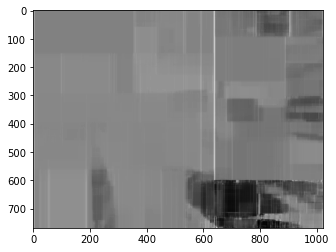

"\n# generate 2d classification dataset\n# scatter plot, dots colored by class value\ndf = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))\ncolors = {0:'red', 1:'blue'}\nfig, ax = pyplot.subplots()\ngrouped = df.groupby('label')\nfor key, group in grouped:\n    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])\npyplot.show()\n"

In [1]:

import scipy.misc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

raccoon = scipy.misc.face(gray=True)
print(raccoon.shape)

########### pdf
pdf_raccoon = raccoon.flatten()
print(pdf_raccoon.shape)

########## CDF
cdf_raccoon = np.cumsum(pdf_raccoon)
cdf_raccoon = cdf_raccoon / cdf_raccoon[-1] #normalizing cdf

####### uniform sampling
n_samples =200000            # number of training samples
uni = np.random.uniform(0, 1 - 1e-10, n_samples)
new_sampled_cdf = np.searchsorted(cdf_raccoon, uni)
#new_sampled_cdf = pdf_raccoon[new_sampled_cdf]
print(new_sampled_cdf)

########## backgraound
n0_samples = n_samples
background = np.random.uniform(0, pdf_raccoon.shape[0], n0_samples)
print(background)

###### running trees

##### target assignement
Y = np.ones(n_samples)
Y = np.hstack((Y,np.zeros(n0_samples)))
print(Y.shape)

##### samples for RandomForest
X = np.hstack((new_sampled_cdf,background))
X = X.reshape((-1,1))

xy_features = 0

if (xy_features):
    ########## RandomForest
    pixels = [[i] for i in range(pdf_raccoon.shape[0])]


else:
    temp = []
    col = raccoon.shape[1]
    for i in range( X.shape[0] ):
        temp.append([X[i][0]//col, X[i][0]%col])
    X = temp
    ########## RandomForest
    pixels = [[i,j] for i in range(raccoon.shape[0]) for j in range(raccoon.shape[1]) ]



###### moon data set
#X,Y = make_moons(n_samples=1000, shuffle=False, noise=None, random_state=None)
#print(X,Y)

########## RandomForest
regr = RandomForestRegressor(max_depth=12, n_estimators=80)
#regr = ExtraTreesRegressor(max_depth=12, n_estimators=80)
regr.fit(X, Y)
print('____________________________________________________')
#print(pixels)
output = regr.predict(pixels)
output =  255*output.reshape((768,1024))
#output[output<0.5] = 0
#output[output!=0] = 1


to_plot = output
plt.gray()
plt.imshow(to_plot)
plt.show()

'''
# generate 2d classification dataset
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()
'''